In [38]:
import pandas as pd
import numpy as np

In [39]:
#J'importe les DataFrame
df1=pd.read_csv('../data/world-happiness-report.csv')
df2_full=pd.read_csv('../data/world-happiness-report-2021.csv')
display(df1.head(1))
display(df2_full.head(1))

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.37,0.451,50.8,0.718,0.168,0.882,0.518,0.258


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.78,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253


In [40]:
#Je commence par supprimer les colonnes inu du df 2021 
df2=df2_full.drop(['Regional indicator','Standard error of ladder score','upperwhisker',
                   'lowerwhisker','Ladder score in Dystopia','Explained by: Log GDP per capita',
                   'Explained by: Social support','Explained by: Healthy life expectancy',
                   'Explained by: Freedom to make life choices','Explained by: Generosity',
                   'Explained by: Perceptions of corruption','Dystopia + residual'],axis=1)
#J'ajoute la colonne "year" pour pouvoir le concatener avec le df1
df2.insert(loc=1,column='year',value=2021)

In [41]:
#Je renomme mes colonnes avant de concatener
df2=df2.rename(columns={'Ladder score':'Life Ladder','Logged GDP per capita':'Log GDP per capita',
                        'Healthy life expectancy':'Healthy life expectancy at birth'})

#je réindex par rapport au df1
#df2.index=df2.index+1950
df2.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,2021,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,2021,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,2021,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,2021,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,2021,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [42]:
#je concatene ensuite mes deux bases
df_global=pd.concat([df1,df2],axis=0)
df_global

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.800,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.200,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.600,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.920,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.240,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,2021,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,NaN,NaN
145,Botswana,2021,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,NaN,NaN
146,Rwanda,2021,3.415,7.676,0.552,61.400,0.897,0.061,0.167,NaN,NaN
147,Zimbabwe,2021,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,NaN,NaN


In [43]:
#Je vais ajouter à notre df_global les continents comme il y a sur le df 2021
#j'appure le df2 pour faire un df que avec les continents
df_continents=df2_full[['Country name','Regional indicator']]

In [44]:
#Ici j'ajoute les continents au df_global en fesant une fusion du df_global et du df_continent
df_global2=df_global.merge(right=df_continents,on='Country name',how='outer')

In [45]:
#Ici je replace le regional indicator à une place plus adéquat
df_global2.insert(1,'Regional indicator',df_global2.pop('Regional indicator'))
df_global2.head()

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,South Asia,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,South Asia,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,South Asia,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,South Asia,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,South Asia,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [46]:
#Je vérifie si il y a des nan dans la variable des continents
df_global2['Regional indicator'].isna().sum()

#Il y en a 63, on va voir de quels pays il sagit.

63

In [47]:
df_nan_continents=df_global2[df_global2['Regional indicator'].isna()]
df_nan_continents.groupby('Country name').agg('min').shape
#Il y a 17 pays auquels il manque le continent

(17, 11)

In [48]:
#J'ai donc pris ces 17 pays dans un fichier csv avec leur continent ainsi que tous les autres pays du df2021
df_continents=pd.read_csv('../data/pays&continents.csv',sep=';')
df_continents

,Country name,Regional indicator
0,Finland,Western Europe
1,Denmark,Western Europe
2,Switzerland,Western Europe
3,Iceland,Western Europe
4,Netherlands,Western Europe
...,...,...
161,South Sudan,Middle East and North Africa
162,Sudan,Middle East and North Africa
163,Suriname,Latin America and Caribbean
164,Syria,Middle East and North Africa


In [49]:
df_global2=df_global.merge(right=df_continents,on='Country name',how='outer')

In [50]:
df_global2['Regional indicator'].isna().sum()
#C'est bon il n'y a plus de Nan pour les continents

0

In [51]:
#Je replace la colonne 'regional indicator' à sa place
df_global2.insert(1,'Regional indicator',df_global2.pop('Regional indicator'))
df_global2.head()

#Voici notre Dataframe complet avec les années jusqu'en 2021 ainsi que tous les continents

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,South Asia,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,South Asia,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,South Asia,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,South Asia,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,South Asia,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [52]:
df_global2.info()
#Les types de données ont l'air cohérents

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2098 non-null   object 
 1   Regional indicator                2098 non-null   object 
 2   year                              2098 non-null   int64  
 3   Life Ladder                       2098 non-null   float64
 4   Log GDP per capita                2062 non-null   float64
 5   Social support                    2085 non-null   float64
 6   Healthy life expectancy at birth  2043 non-null   float64
 7   Freedom to make life choices      2066 non-null   float64
 8   Generosity                        2009 non-null   float64
 9   Perceptions of corruption         1988 non-null   float64
 10  Positive affect                   1927 non-null   float64
 11  Negative affect                   1933 non-null   float64
dtypes: flo

In [53]:
#Analyse des doublons : visiblement il n'y a pas de doublons
df_global2.duplicated().sum()

0

In [54]:
#On va regarder la coherence des données voir si il n'y a pas de pays mal orthographiés etc
df_global2['Country name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jord

In [55]:
df_global2.isna().sum()

Country name                          0
Regional indicator                    0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                     171
Negative affect                     165
dtype: int64

In [56]:
#On va maintenant, à partir du df_global2 pouvoir s'occuper des valeurs manquantes
#Ma stratégie serait de remplir les Nan avec la mediane des valeurs par pays sur les différentes années. 
#Dans le cas c'est infaisable car un pays aurait aucune valeurs de la variable en question on pourrait faire cela avec
#la médiane de la valeur par continent.
#Je commence alors par le faire pour les pays et si il reste des Nan je ferais grâce aux continents.

In [57]:
#Je test le clalcul de la mediane en fonction des variables de pays groupés
test=df_global2.groupby('Country name')['Perceptions of corruption'].agg('median')
test

Country name
Afghanistan    0.8710
Albania        0.8800
Algeria        0.7000
Angola         0.8700
Argentina      0.8510
                ...  
Venezuela      0.8200
Vietnam        0.7890
Yemen          0.8145
Zambia         0.8110
Zimbabwe       0.8305
Name: Perceptions of corruption, Length: 166, dtype: float64

In [58]:
#Ici j'ai trié pour explorer les differentes variables, comprendre un peu les Nan
df_global2.sort_values('Perceptions of corruption').tail(50)

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1164,Malta,Western Europe,2013,6.380,10.422,0.942,71.96,0.909,0.410,NaN,0.660,0.370
1414,Oman,Middle East and North Africa,2011,6.853,10.382,NaN,65.50,0.916,0.025,NaN,NaN,0.295
1535,Qatar,Middle East and North Africa,2010,6.850,11.520,NaN,66.70,NaN,0.104,NaN,NaN,NaN
1536,Qatar,Middle East and North Africa,2011,6.592,11.553,0.857,67.02,0.905,0.012,NaN,0.761,0.328
1537,Qatar,Middle East and North Africa,2012,6.611,11.523,0.838,67.34,0.924,0.162,NaN,0.766,0.322
1538,Qatar,Middle East and North Africa,2015,6.375,11.486,NaN,68.30,NaN,NaN,NaN,NaN,NaN
1583,Saudi Arabia,Middle East and North Africa,2007,7.267,10.689,0.892,63.86,0.622,0.005,NaN,0.772,0.232
1586,Saudi Arabia,Middle East and North Africa,2010,6.307,10.693,0.880,64.40,0.678,-0.033,NaN,0.645,0.297
1587,Saudi Arabia,Middle East and North Africa,2011,6.700,10.758,0.830,64.60,0.603,-0.142,NaN,0.726,0.240
1588,Saudi Arabia,Middle East and North Africa,2012,6.396,10.779,0.867,64.80,0.560,-0.120,NaN,0.715,0.225


In [59]:
#Ici je fais un groupement par pays toujours dans le but d'explorer un peu les données
df_global2[df_global2['Country name']=='Oman']

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1414,Oman,Middle East and North Africa,2011,6.853,10.382,NaN,65.5,0.916,0.025,NaN,NaN,0.295


In [60]:
#J'applique pour chaque variable une fonction qui vient remplir les Nan par la mediane du groupement pas pays de la variable
df_global2['Perceptions of corruption']=df_global2.groupby('Country name')['Perceptions of corruption'].transform(lambda x : x.fillna(x.median()))
df_global2['Positive affect']=df_global2.groupby('Country name')['Positive affect'].transform(lambda x : x.fillna(x.median()))
df_global2['Negative affect']=df_global2.groupby('Country name')['Negative affect'].transform(lambda x : x.fillna(x.median()))
df_global2['Generosity']=df_global2.groupby('Country name')['Generosity'].transform(lambda x : x.fillna(x.median()))
df_global2['Freedom to make life choices']=df_global2.groupby('Country name')['Freedom to make life choices'].transform(lambda x : x.fillna(x.median()))
df_global2['Healthy life expectancy at birth']=df_global2.groupby('Country name')['Healthy life expectancy at birth'].transform(lambda x : x.fillna(x.median()))
df_global2['Social support']=df_global2.groupby('Country name')['Social support'].transform(lambda x : x.fillna(x.median()))
df_global2['Log GDP per capita']=df_global2.groupby('Country name')['Log GDP per capita'].transform(lambda x : x.fillna(x.median()))


In [61]:
#On vérifie les Nan de nouveau
df_global2.isna().sum()

#On comprend ici que certains Nan n'ont pas pu etre remplis par manque de donnée et impossibilité de calculer la mediane avec rien

Country name                         0
Regional indicator                   0
year                                 0
Life Ladder                          0
Log GDP per capita                  12
Social support                       1
Healthy life expectancy at birth     4
Freedom to make life choices         0
Generosity                          12
Perceptions of corruption            2
Positive affect                      3
Negative affect                      2
dtype: int64

In [62]:
#J'explore df_global2 pour les lignes qui contiennent encore des Nan
#df_global2[df_global2.isna().any(axis=1)]

#par manque de données on va emmetre l'hypothese que ces pays sont à des scores de q1 par rapport au continent auxquel ils appartiennt

In [63]:
df_global2['Perceptions of corruption']=df_global2.groupby('Regional indicator')['Perceptions of corruption'].transform(lambda x : x.fillna(x.quantile(q=0.25)))
df_global2['Positive affect']=df_global2.groupby('Regional indicator')['Positive affect'].transform(lambda x : x.fillna(x.quantile(q=0.25)))
df_global2['Negative affect']=df_global2.groupby('Regional indicator')['Negative affect'].transform(lambda x : x.fillna(x.quantile(q=0.25)))
df_global2['Generosity']=df_global2.groupby('Regional indicator')['Generosity'].transform(lambda x : x.fillna(x.quantile(q=0.25)))
df_global2['Healthy life expectancy at birth']=df_global2.groupby('Regional indicator')['Healthy life expectancy at birth'].transform(lambda x : x.fillna(x.quantile(q=0.25)))
df_global2['Social support']=df_global2.groupby('Regional indicator')['Social support'].transform(lambda x : x.fillna(x.quantile(q=0.25)))
df_global2['Log GDP per capita']=df_global2.groupby('Regional indicator')['Log GDP per capita'].transform(lambda x : x.fillna(x.quantile(q=0.25)))

In [64]:
df_global2.isna().sum()

#Nous avons remplie tous les Nan

Country name                        0
Regional indicator                  0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [65]:
df_global2

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,South Asia,2008,3.724,7.370,0.451,50.800,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,South Asia,2009,4.402,7.540,0.552,51.200,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,South Asia,2010,4.758,7.647,0.539,51.600,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,South Asia,2011,3.832,7.620,0.521,51.920,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,South Asia,2012,3.783,7.705,0.521,52.240,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...,...
2093,Zimbabwe,Sub-Saharan Africa,2017,3.638,8.016,0.754,55.000,0.753,-0.098,0.751,0.806,0.224
2094,Zimbabwe,Sub-Saharan Africa,2018,3.616,8.049,0.775,55.600,0.763,-0.068,0.844,0.710,0.212
2095,Zimbabwe,Sub-Saharan Africa,2019,2.694,7.950,0.759,56.200,0.632,-0.064,0.831,0.716,0.235
2096,Zimbabwe,Sub-Saharan Africa,2020,3.160,7.829,0.717,56.800,0.643,-0.009,0.789,0.703,0.346


In [71]:
#Pour faire une analyse avec prise de recul nous regroupons les données des pays en faisant la moyenne 
#des indicateurs toutes années confondues.

#Df regroupé par année sans l'indication de region (utile pour faire la heatmap)
df_global2_mean=df_global2.drop(['Regional indicator','year'],axis=1).groupby('Country name').agg('mean')
df_global2_mean

#Df regroupé par année avec l'indication de region (utile pour faire le boxplot)
df_global2_mean_region=df_global2_mean.merge(right=df_continents,on='Country name',how='outer')
df_global2_mean_region.insert(1,'Regional indicator',df_global2_mean_region.pop('Regional indicator'))

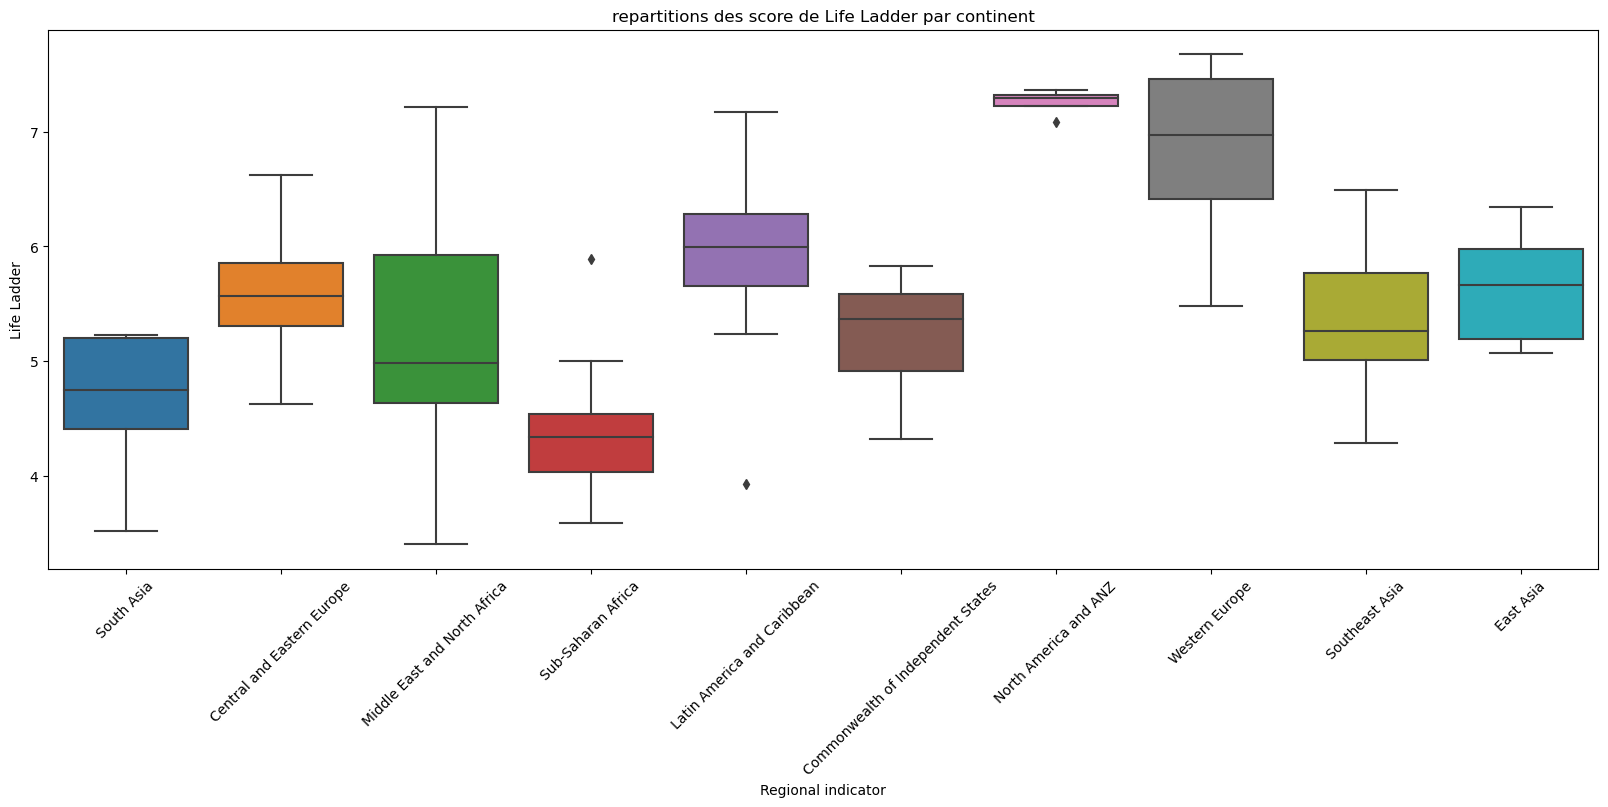

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,7))
sns.boxplot(x='Regional indicator',y='Life Ladder',data=df_global2_mean_region)
plt.xticks(rotation=45)
plt.title('repartitions des score de Life Ladder par continent')
plt.show()

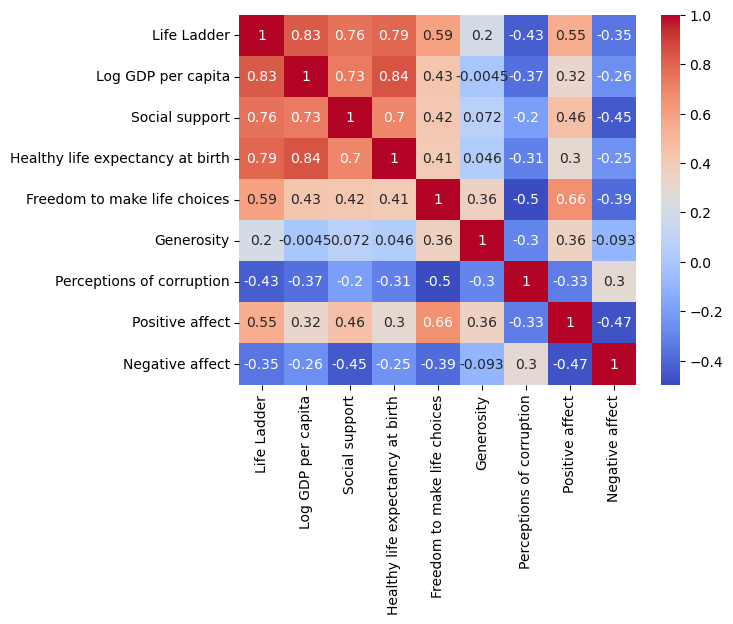

In [75]:
#Il est interessant d'analyser les correlation entre nos données.

sns.heatmap(df_global2_mean.corr(), annot=True, cmap='coolwarm')
plt.show()

In [115]:
#Analyses de correlation des variables ayant le plus de lien avec le Life ladder

#LE PIB par habitant : est ce que plus un pays est riche plus il est heureux ? 

import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(df_global2, x='Log GDP per capita',y='Life Ladder',color='Regional indicator',hover_data=['Country name'])
fig.show()

In [114]:
#La santé: est ce que les indicateurs de bonne santé influent sur le bonheur ? 

import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(df_global2, x='Healthy life expectancy at birth',y='Life Ladder'
                 ,color='Regional indicator',hover_data=['Country name'])
fig.show()


In [106]:
df_global_mean_per_region=df_global2_mean_region.drop(['Country name'],axis=1).groupby(["Regional indicator"]).agg('mean')

fig = px.bar(df_global_mean_per_region,x=df_global_mean_per_region.index,y='Perceptions of corruption')
fig.show()


In [110]:
#Essayons de faire apparaite la corruption sur les graphes plus haut

import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(df_global2_mean_region, x='Log GDP per capita',y='Life Ladder',color='Regional indicator',
                 size="Perceptions of corruption",hover_data=['Country name','Perceptions of corruption'])
fig.show()

In [ ]:
#Maintenant que notre df est entier, sans valeurs manquantes, sans fautes ni doublons,
#Que nous avons produit des graphiques avec df_global2
#nous pourrions reflechir à en faire une version viable pour un modèle de machine learning.
#Car j'aimerais aussi reflechir a faire un modele d'ACP pour pousser mon analyse precedente

#Pour cela nous allons normaliser les données quantitatives et encoder les variables qualitatives

#A FAIRE

In [82]:
#On creer un dataframe sans les colonnes qui ne sont pas utiles au machine learning
df_global2_forML=df_global2.drop(['Country name','year'],axis=1)
df_global2_forML


,Regional indicator,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,South Asia,3.724,7.370,0.451,50.800,0.718,0.168,0.882,0.518,0.258
1,South Asia,4.402,7.540,0.552,51.200,0.679,0.190,0.850,0.584,0.237
2,South Asia,4.758,7.647,0.539,51.600,0.600,0.121,0.707,0.618,0.275
3,South Asia,3.832,7.620,0.521,51.920,0.496,0.162,0.731,0.611,0.267
4,South Asia,3.783,7.705,0.521,52.240,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...
2093,Sub-Saharan Africa,3.638,8.016,0.754,55.000,0.753,-0.098,0.751,0.806,0.224
2094,Sub-Saharan Africa,3.616,8.049,0.775,55.600,0.763,-0.068,0.844,0.710,0.212
2095,Sub-Saharan Africa,2.694,7.950,0.759,56.200,0.632,-0.064,0.831,0.716,0.235
2096,Sub-Saharan Africa,3.160,7.829,0.717,56.800,0.643,-0.009,0.789,0.703,0.346
